In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(600, 800, 3)


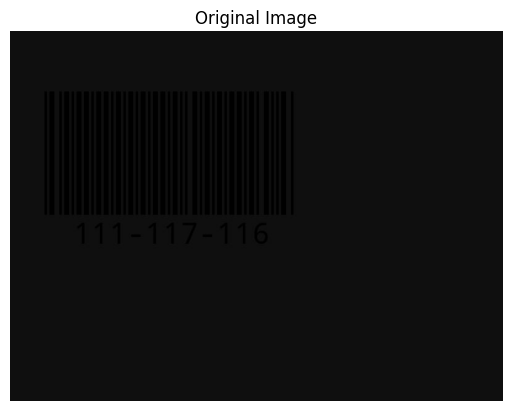

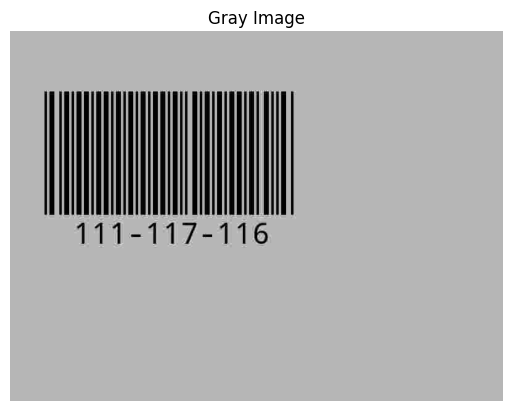

In [68]:
img = cv2.imread("test cases/05 - meen taffa el nour!!!.jpg")
print(img.shape)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.title("Gray Image")
plt.axis('off')
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 0.      ,  0.328125,  0.65625 ,  0.984375,  1.3125  ,  1.640625,
         1.96875 ,  2.296875,  2.625   ,  2.953125,  3.28125 ,  3.609375,
         3.9375  ,  4.265625,  4.59375 ,  4.921875,  5.25    ,  5.578125,
         5.90625 ,  6.234375,  6.5625  ,  6.890625,  7.21875 ,  7.546875,
         7.875   ,  8.203125,  8.53125 ,  8.859375,  9.1875  ,  9.515625,
         9.84375 , 10.171875, 10.5     , 10.828125, 11.15625 , 11.484375,
        11.8125  , 12.140625, 12.46875 , 12.796875, 13.125   , 13.453125,
        13.78125 , 14.109375, 14.4375  , 14.765625, 15.09375 , 15.421875,
        15.75    , 16.078125, 16.40625 , 16.734375, 17.0625  , 17.390625,
        17.71875 , 18.046875, 18.375   , 18.703125, 19.03125 , 19.359375,
        19.

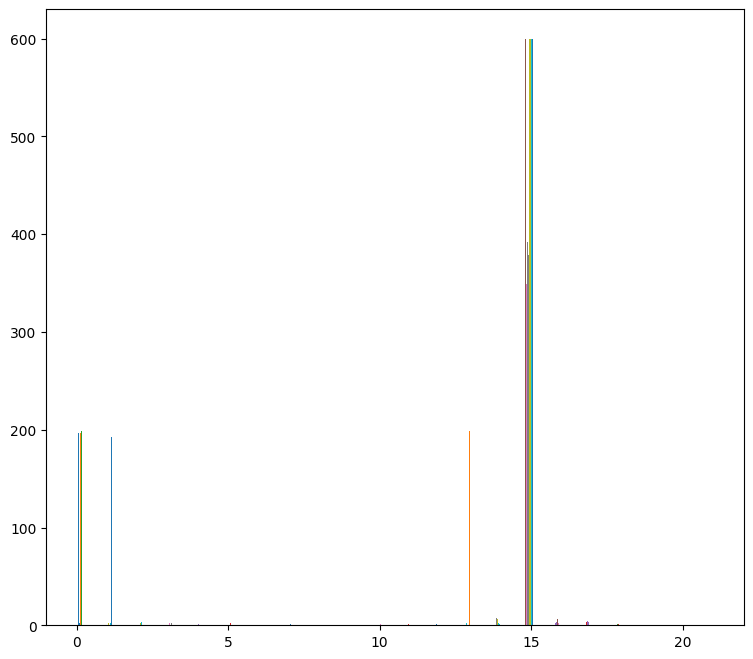

In [6]:
plt.figure(figsize=(9,8))
plt.hist(img_gray, bins=64)

(array([[  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.],
        [  0.,   0.,   0., ...,   0.,   0., 600.]]),
 array([  0.      ,   3.984375,   7.96875 ,  11.953125,  15.9375  ,
         19.921875,  23.90625 ,  27.890625,  31.875   ,  35.859375,
         39.84375 ,  43.828125,  47.8125  ,  51.796875,  55.78125 ,
         59.765625,  63.75    ,  67.734375,  71.71875 ,  75.703125,
         79.6875  ,  83.671875,  87.65625 ,  91.640625,  95.625   ,
         99.609375, 103.59375 , 107.578125, 111.5625  , 115.546875,
        119.53125 , 123.515625, 127.5     , 131.484375, 135.46875 ,
        139.453125, 143.4375  , 147.421875, 151.40625 , 155.390625,
        159.375   , 163.359375, 167.34375 , 171.328125, 175.3125  ,
        179.296875, 183.28125 , 187.265625, 191.25    , 195.234375,

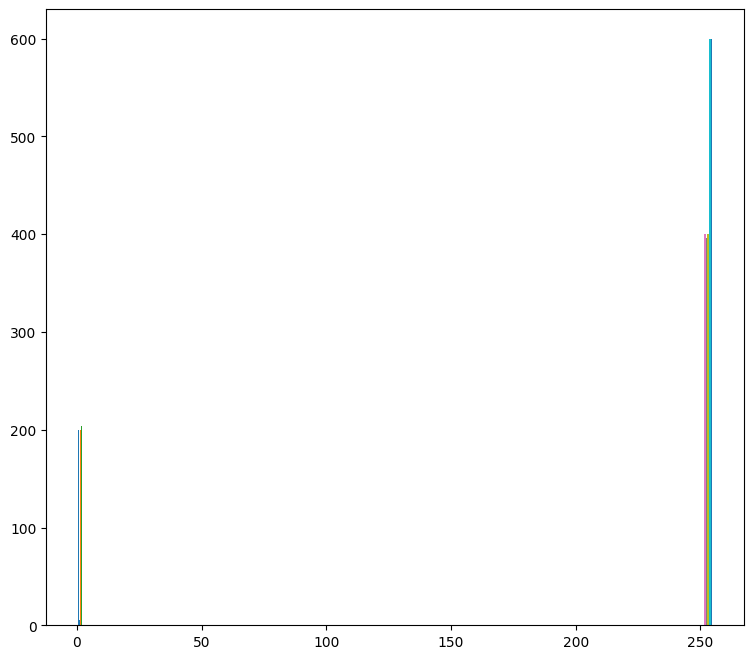

In [40]:
_, thresholded_image = cv2.threshold(img_gray, 5, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(9,8))
plt.hist(thresholded_image, bins=64)

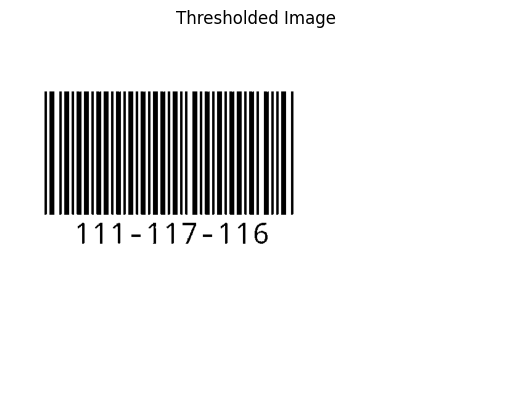

In [8]:

inverted_image = cv2.bitwise_not(thresholded_image)
plt.imshow(inverted_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

In [62]:
import cv2
import numpy as np

def get_thresholds(img, percentage=0.05):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculate the histogram
    histogram = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()
    
    # Calculate the cumulative distribution of the histogram
    cumulative_distribution = np.cumsum(histogram)
    
    # Total number of pixels in the image
    total_pixels = cumulative_distribution[-1]
    
    # Calculate the threshold pixel count for the given percentage
    threshold_pixel_count = total_pixels * percentage
    
    # Find the smallest pixel value whose frequency is at least 5%
    smallest_pixel_value = np.searchsorted(cumulative_distribution, threshold_pixel_count)
    
    # Find the largest pixel value whose frequency is at least 5%
    largest_pixel_value = np.searchsorted(cumulative_distribution, total_pixels - threshold_pixel_count)
    
    return smallest_pixel_value, largest_pixel_value

Average Intensity: 13.4706375
Smallest Pixel Value (5%): 0
Largest Pixel Value (5%): 15


In [78]:
def contrast_correction(img):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average pixel intensity
    avg_intensity = np.mean(img_gray)
    print(avg_intensity)
    '''
    0 -> Black
    255 -> White

    any thing smaller than the threshold is considered black (0)
    any thing larger than the threshold is considered white (255)
    hence the name binary thresholding
    
    '''
    smallest_pixel_value, largest_pixel_value = get_thresholds(img, 0.05)
    img_median = (smallest_pixel_value + largest_pixel_value) // 2

    _, thresholded_image = cv2.threshold(img_gray, img_median, 255, cv2.THRESH_BINARY)
    return thresholded_image
 


13.4706375


True

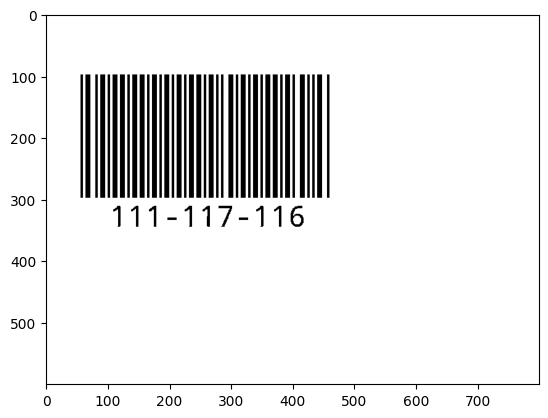

In [70]:
result = is_image_bright(img)
plt.imshow(result, cmap='gray')
cv2.imwrite("output2.jpg", result)

253.61312291666667


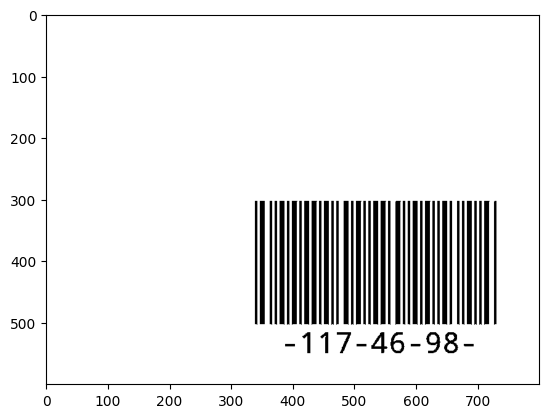

In [71]:
bright_image = cv2.imread("test cases/06 - meen fata7 el nour 333eenaaayy.jpg")
result = is_image_bright(bright_image)
plt.imshow(result, cmap='gray')

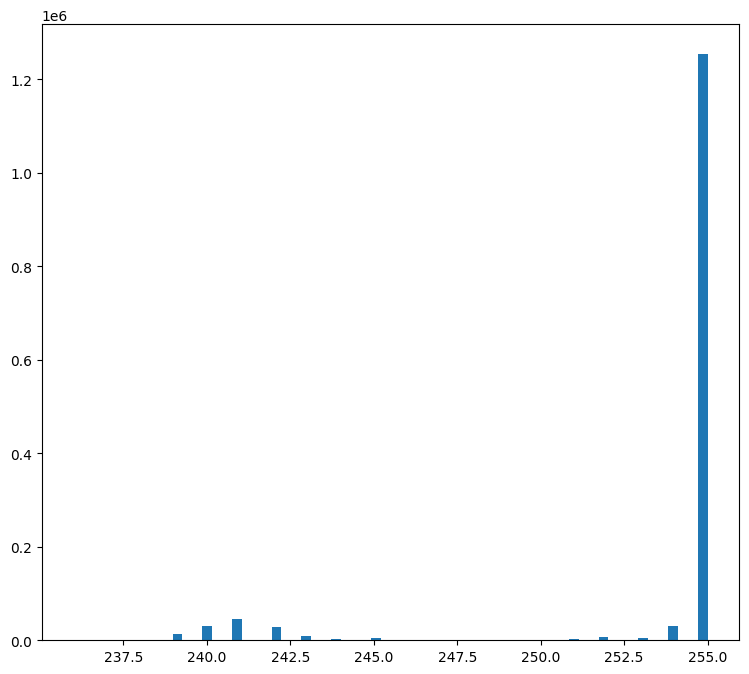

In [47]:
# histogram of the grayscale image
plt.figure(figsize=(9,8))
plt.hist(bright_image.ravel(), bins=64)
plt.show()

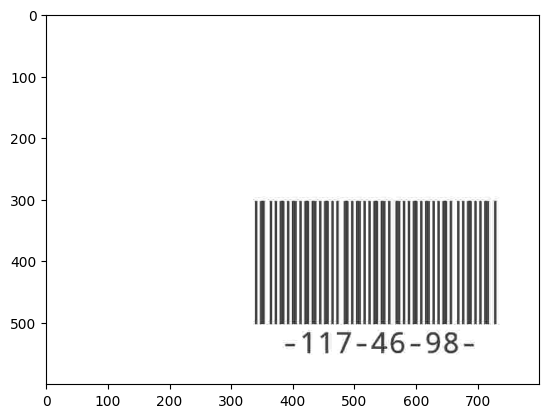

In [8]:
# get grayscale image
gray_image = cv2.cvtColor(bright_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

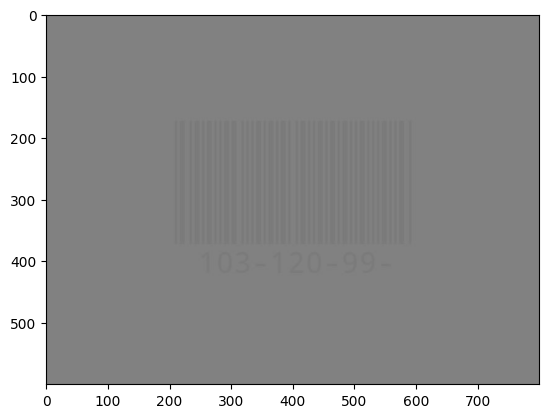

In [74]:
grey_image = cv2.imread("test cases/10 - wen el kontraastttt.jpg")
plt.imshow(grey_image, cmap='gray')

128.40523541666667


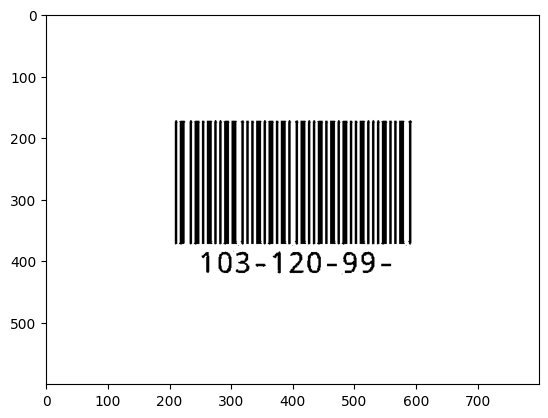

In [75]:
result = is_image_bright(grey_image)
plt.imshow(result, cmap='gray')

Otsu's threshold: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


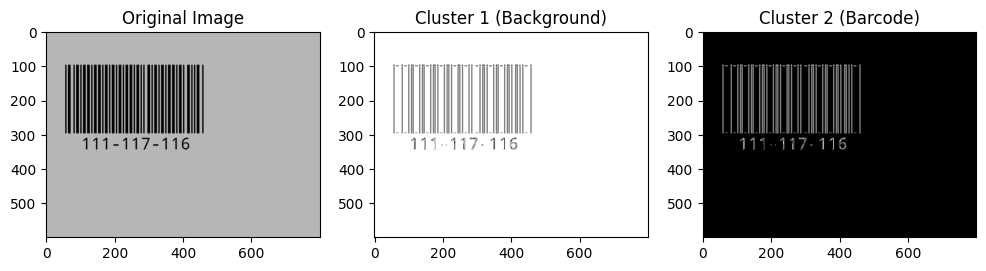

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image

# Calculate histogram
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# Apply Otsu's thresholding
_, threshold = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f"Otsu's threshold: {threshold}")
# Separate clusters
cluster1 = (img_gray <= threshold).astype(np.uint8) * 255  # Background
cluster2 = (img_gray > threshold).astype(np.uint8) * 255   # Barcode

# Visualize results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.title("Original Image"), plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 2), plt.title("Cluster 1 (Background)"), plt.imshow(cluster1, cmap='gray')
plt.subplot(1, 3, 3), plt.title("Cluster 2 (Barcode)"), plt.imshow(cluster2, cmap='gray')
plt.show()


196.08360416666667


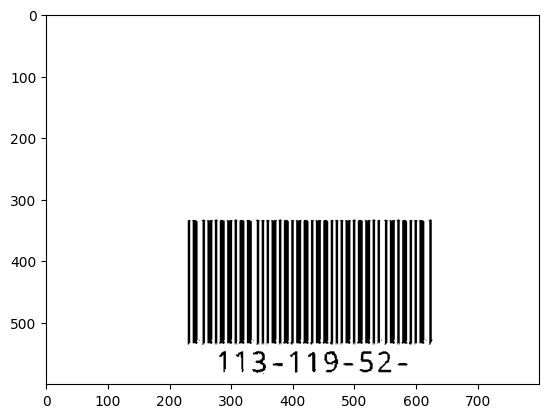

In [87]:
easy_image = cv2.imread("test cases/08 - compresso espresso.jpg")
plt.imshow(easy_image, cmap='gray')
result = contrast_correction(easy_image)
plt.imshow(result, cmap='gray')

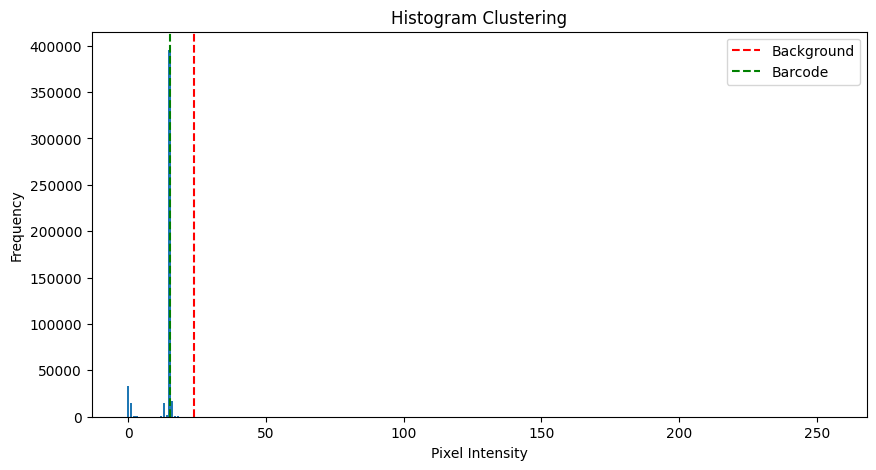

In [61]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import cv2

def cluster_histogram_dbscan(histogram, eps=10, min_samples=5):
    """
    Cluster histogram using DBSCAN with adaptive parameters.
    
    Args:
        histogram (np.array): 1D histogram values
        eps (float): DBSCAN epsilon parameter
        min_samples (int): Minimum samples for a cluster
    
    Returns:
        tuple: (background_cluster, barcode_cluster) centroids
    """
    # Prepare data with non-zero histogram values
    pixel_intensities = np.arange(len(histogram))
    mask = histogram > 0
    data = np.column_stack([pixel_intensities[mask], histogram[mask]])
    
    # Try clustering with increasing flexibility
    for current_eps in [eps, eps*2, eps*3]:
        for current_min_samples in [min_samples, max(1, min_samples-2)]:
            dbscan = DBSCAN(eps=current_eps, min_samples=current_min_samples)
            labels = dbscan.fit_predict(data)
            
            # Exclude noise points
            unique_labels = set(labels) - {-1}
            
            if len(unique_labels) >= 2:
                cluster_centers = []
                for label in unique_labels:
                    cluster_data = data[labels == label]
                    cluster_center = np.mean(cluster_data[:, 0])
                    cluster_centers.append(cluster_center)
                
                return tuple(sorted(cluster_centers))
    
    # Fallback to manual peak detection
    sorted_indices = np.argsort(histogram)
    return sorted_indices[0], sorted_indices[-1]

def visualize_clustering(histogram, background_cluster, barcode_cluster):
    """Visualize histogram clustering results."""
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(histogram)), histogram)
    plt.axvline(x=background_cluster, color='r', linestyle='--', label='Background')
    plt.axvline(x=barcode_cluster, color='g', linestyle='--', label='Barcode')
    plt.title('Histogram Clustering')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def process_image(image_path):
    """Process image and perform histogram clustering."""
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()
    
    background, barcode = cluster_histogram_dbscan(histogram)
    visualize_clustering(histogram, background, barcode)
    
    return background, barcode
# Example usage
# Load the bright image

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256]).flatten()

# Cluster the histogram using DBSCAN
background, barcode = cluster_histogram_dbscan(histogram)

# Calculate the midpoint

# Visualize the clustering results
visualize_clustering(histogram, background, barcode)